In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('/kaggle/input/endangered-species/Table 3  Species by kingdom and class - show all.csv')

# Replace commas in the dataset
data = data.replace(',', '', regex=True)

# Convert the 'Subtotal (threatened spp.)' column to numeric
data['Subtotal (threatened spp.)'] = pd.to_numeric(data['Subtotal (threatened spp.)'])

# Drop unnecessary columns and separate features from labels
features = data.drop(['EN', 'Total'], axis=1)  # Dropping 'EN' and 'Total' columns
labels = data['Subtotal (threatened spp.)']

# Perform one-hot encoding for categorical variables
features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, labels, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         0
          69       0.00      0.00      0.00         1
        1354       0.00      0.00      0.00         1
        2186       0.00      0.00      0.00         0
        2876       0.00      0.00      0.00         0
        3359       0.00      0.00      0.00         1
       21743       0.00      0.00      0.00         0
       44016       0.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/endangered-species/Table 3  Species by kingdom and class - show all.csv')

# Print column names
print(data.columns)

Index(['Name', 'EX', 'EW', 'Subtotal (EX+EW)', 'CR(PE)', 'CR(PEW)',
       'Subtotal (EX+EW+ CR(PE)+CR(PEW))', 'CR', 'EN', 'VU',
       'Subtotal (threatened spp.)', 'LR/cd', 'NT or LR/nt', 'LC or LR/lc',
       'DD', 'Total'],
      dtype='object')


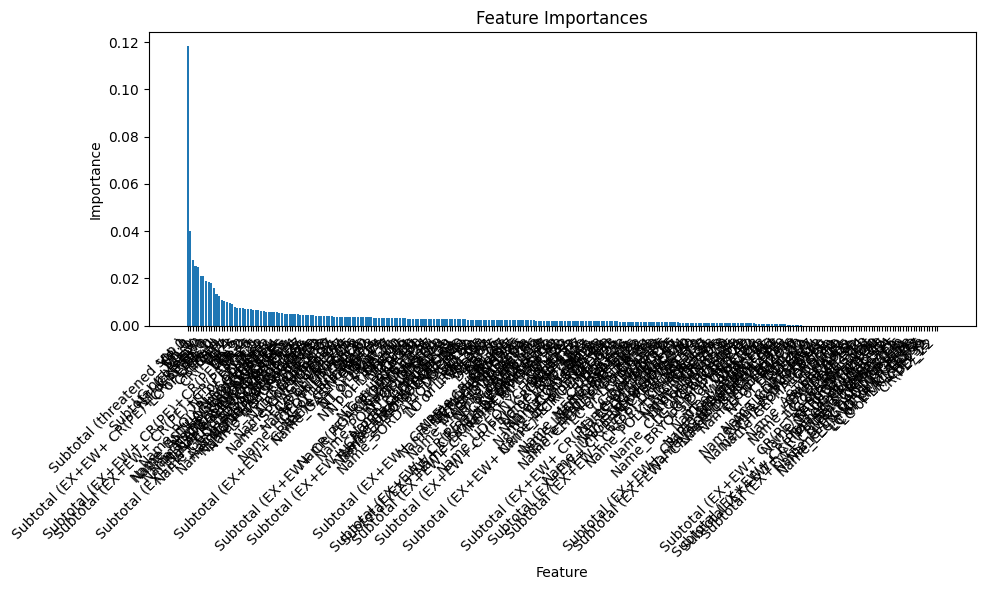

In [15]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest classifier
importances = clf.feature_importances_

# Get the names of the features
feature_names = features_encoded.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
